# ANÁLISIS EXPLORATORIO DE DATOS (EDA)
## DATASET: **Víctimas**

## Índice de contenido

1. **Ingesta de datos**

2. **Inspección preliminar**

3. **Duplicados**

4. **Valores faltantes**

5. **Outliers**

6. **Gráficos (variables cuantitativas)**

7. **Gráficos (variables cualitativas)**



## 1. Ingesta de datos

### 1.1 Importamos librerías

In [199]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

<p>



</p>

### 1.2 Leemos los datasets

Importamos el dataset en formato .xlsx

In [200]:
df = pd.read_excel('data/victimas.xlsx')

<p>



</p>

## 2. Inspección preliminar del dataset

**MUESTRA**

Comenzamos con una rapida muestra de los primeros datos del dataset

In [201]:
df.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


<p>



</p>

**COLUMNAS Y FILAS**

Mediante el uso de **.shape**, vemos la cantidad de columnnas y de registros respectivamente

In [202]:
df.shape

(717, 10)

<p>



</p>

**NOMBRES DE COLUMNAS**

A continuación, bservamos los nombres de las columnas para identificar inconsistencias.

No se encuentran inconsistencias en las columnas, sus nombres son claros y comunican de forma clara lo que contienen. 

In [203]:
df.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

<p>



</p>

**TIPOS DE DATOS Y VALORES FALTANTES**

Mediante el uso de **.info()** observamos tipos de datos de cada columna y si poseen nulos.

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


<p>



</p>

Observamos los porcentajes de valores 'SD' en las columnas

In [205]:
columnas_interes = ['VICTIMA', 'SEXO', 'ROL', 'FECHA_FALLECIMIENTO', 'EDAD']

for columna in columnas_interes:
    porcentaje = (df[columna][df[columna] == 'SD'].count() / df.shape[0]) * 100
    print(f"Porcentaje de 'SD' en {columna} = {porcentaje:.2f}%")

Porcentaje de 'SD' en VICTIMA = 1.26%
Porcentaje de 'SD' en SEXO = 0.84%
Porcentaje de 'SD' en ROL = 1.53%
Porcentaje de 'SD' en FECHA_FALLECIMIENTO = 9.48%
Porcentaje de 'SD' en EDAD = 7.39%


<p>



</p>

Para la columna 'EDAD', imputraremos a los SD un valor numerico que identifique error o falta de dato. Usaremos np.nan

Hacemos esto para poder trabajar la columna EDAD como numero si es necesario hacer algun promedio o sacar valores estadisticos. 

In [206]:
df['EDAD'] = df['EDAD'].replace('SD', np.nan)

In [207]:
df['EDAD'].unique()

array([19., 70., 30., 18., 29., 22., 16., 59., 65., 34., 41., 50., 38.,
       21., 52., 36., 20., 54., nan, 56., 24., 78., 79., 26., 57., 37.,
       58., 23., 60., 42., 53., 51., 40., 87., 76., 75., 35., 80., 43.,
       45., 67., 27., 55., 49., 81., 25., 33., 46., 83., 39., 28.,  7.,
       48.,  4., 82., 32., 17., 47., 61., 10., 95., 73., 84., 66., 85.,
        1., 15., 13., 77., 44., 31., 62., 74., 71., 11., 86., 69., 72.,
       12., 63., 92., 68., 91., 64.,  5., 88.])

<p>



</p>

## 3. Duplicados


A continuación se evidencia la existencia o inexistencia de registros duplicados en el dataset. 

Esto es de suma importancia, ya que un dataset con valores duplicados puede sesgar el resultado de los análisis posteriores. 

In [208]:
df.duplicated().sum()

0

## 4. Valores faltantes

En este apartado se buscan los valores faltantes de cada columna y se analiza que hacer con ellos. 

Para este dataset, no tenemos columnas con valores faltantes

In [209]:
df.isnull().sum()

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                     0
VICTIMA                 0
SEXO                    0
EDAD                   53
FECHA_FALLECIMIENTO     0
dtype: int64

<p>



</p>

## 5. Outliers

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 664 non-null    float64       
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 56.1+ KB


En esta sección identificaremos los **outliers** del dataset, es decir, aquellos valores que ***“escapan al rango en donde se concentran la mayoría de muestras"***

Previo a la identificación de estos valores, definiremos las columnas que queremos analizar. 

En este caso seran: EDAD, AAAA, MM y DD

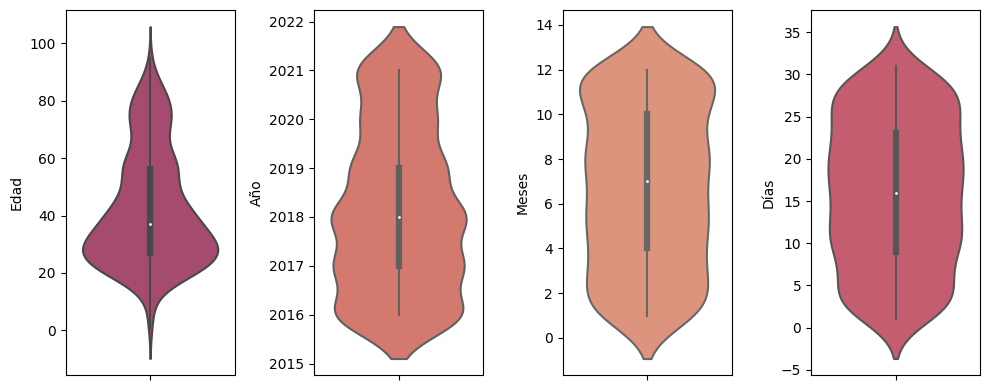

In [211]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos de violín
plt.subplot(1, 4, 1) 
sns.violinplot(data=df, y='EDAD', color = "#b43c6c")
plt.ylabel('Edad')

plt.subplot(1, 4, 2) 
sns.violinplot(data=df, y='AAAA', color = "#e46c5c")
plt.ylabel('Año')

plt.subplot(1, 4, 3) 
sns.violinplot(data=df, y='MM', color = "#ec8c6c")
plt.ylabel('Meses')

plt.subplot(1, 4, 4) 
sns.violinplot(data=df, y='DD', color = "#d44c64")
plt.ylabel('Días')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()


Cada uno de los gráficos que observamos arriba, nos muestran una distribución de las ocurrencias según la variable que estamos analizando. 

El gráfico de 'EDAD' nos muestra un outlier. Está haciendo referencia al valor de error 999 que imputamos en el paso anterior. Por lo tanto lo desestimamos y concluimos que no existen outliers en ninguna de las variables numericas. 

<p>



</p>

## 6. Gráficos (variables cuantitativas)

### 6.1 Correlación de variables

Para identificar la relación entre las variables, crearemos una matriz de correlación. 

In [212]:
# Establecemos cuales son las variables que queremos analizar
variables_numericas = ['EDAD', 'AAAA', 'MM', 'DD']

# Creamos la matriz de correlación
correlation_matrix = df[variables_numericas].corr()

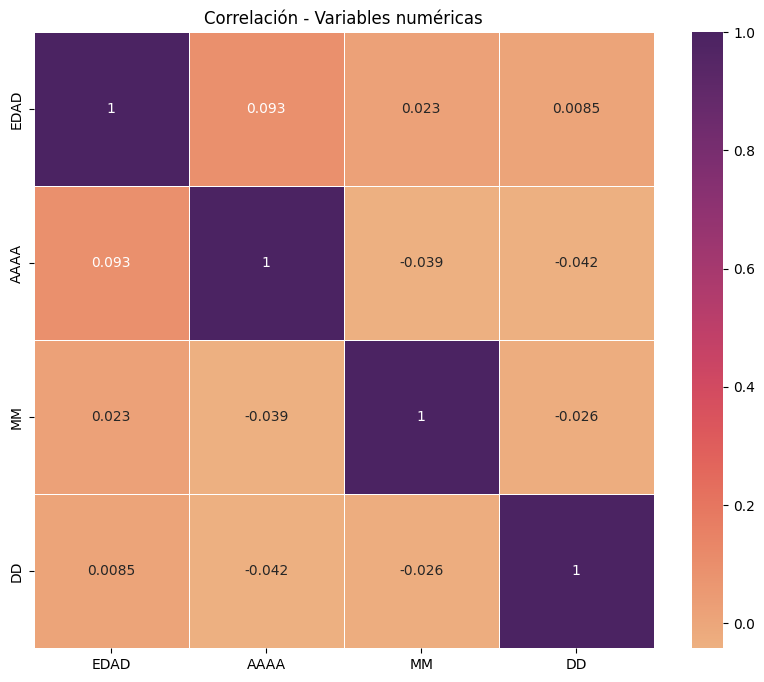

In [213]:
# Graficamos la matriz generada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', linewidths=0.5)
plt.title('Correlación - Variables numéricas')
plt.show()

El análisis revela que la mayoría de los coeficientes de correlación se encuentran cercanos a cero, indicando una correlación débil o nula entre las variables.

Esto tiene sentido ya que, el año, mes, día y hora en la que ocurre el siniestro no esta ligada a la edad de las victimas.


<p>



</p>

### 6.2 Distribución de variables

Mediante la utlización de los siguientes gráficos y estadísticas, buscamos entender en profundidad la información de cada variable.

<p>



</p>

**EDAD**

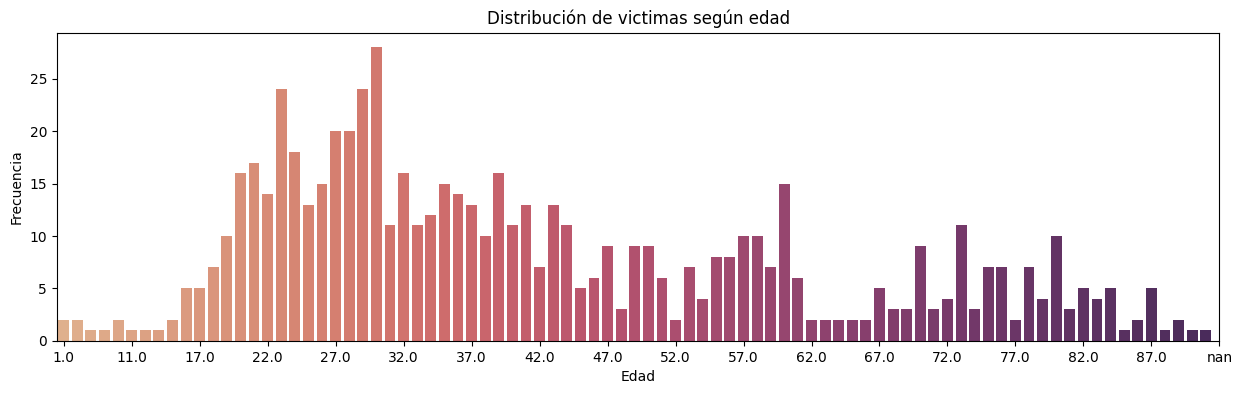

In [221]:
df_filtrado = df[df['EDAD'] != np.nan].sort_values(by='EDAD')

plt.figure(figsize=(15, 4))

sns.countplot(df_filtrado, x='EDAD', palette="flare", )

plt.xticks(range(0, len(df_filtrado['EDAD'].unique()), 5), df_filtrado['EDAD'].unique()[::5])

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de victimas según edad')

plt.show()



El gráfico nos revela que el rango de edad con mayor cantidad de victimas es entre 20 y 30 años de edad.

<p>



</p>

**AAAA** (Año del siniestro)

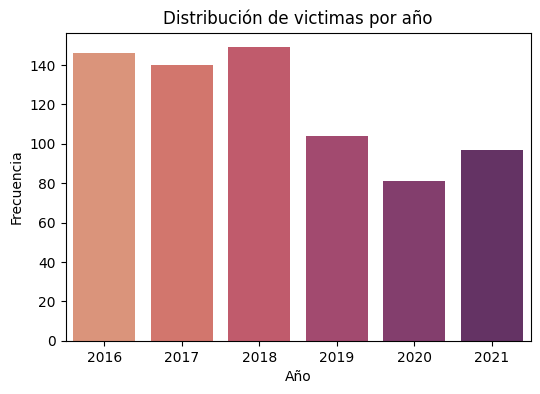

In [215]:
plt.figure(figsize=(6, 4)) 

sns.countplot(df, x='AAAA', palette="flare")

plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de victimas por año')

plt.show()

Al igual que ocurre con el dataset de hechos, podemos ver que los años previos a la pandemia mantenian un nivel constante de victimas.

Luego de la aparición del CO-VID y el lockdown, disminuyeron los accidentes y con ello los homicidios por siniestros viales. 


<p>



</p>

**MM** (Mes del siniestro)


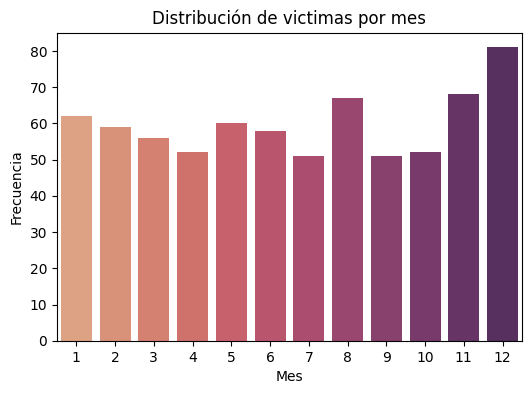

In [216]:
plt.figure(figsize=(6, 4)) 

sns.countplot(df, x='MM', palette="flare")

plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de victimas por mes')

plt.show()

El mes con mayor cantidad de siniestros y victimas es diciembre. 

En primera instancia, y como lo hicimos con los hechos,  podríamos relacionar este comportamiento a las fiestas de fin de año donde aumenta notablemente el tráfico y la consgestión, generando mas accidentes y victimas por siniestros viales.





<p>



</p>

**DD** (Día del siniestro)

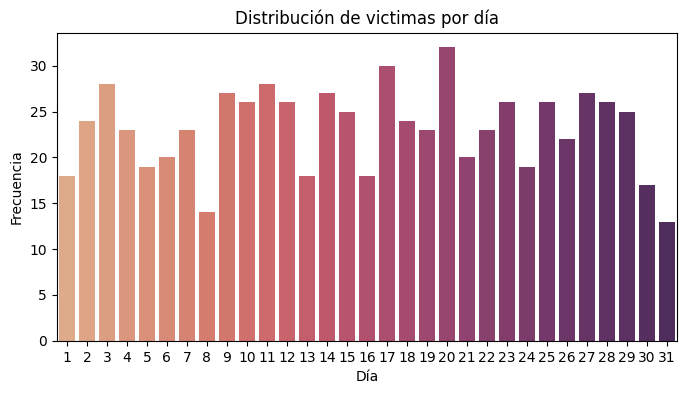

In [217]:
plt.figure(figsize=(8, 4))  # Ajustar el tamaño del gráfico si es necesario

sns.countplot(df, x='DD', palette="flare")

plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.title('Distribución de victimas por día')

plt.show()

<p>



</p>

<p>



</p>

## 7. Gráficos (variables cualitativas)

### 7.1 Distribución de variables

Analizaremos ahora las variables categóricas. 

Tendremos en cuenta para el análisis las siguientes:'ROL', 'VICTIMA' y 'SEXO'

<p>



</p>

**ROL**

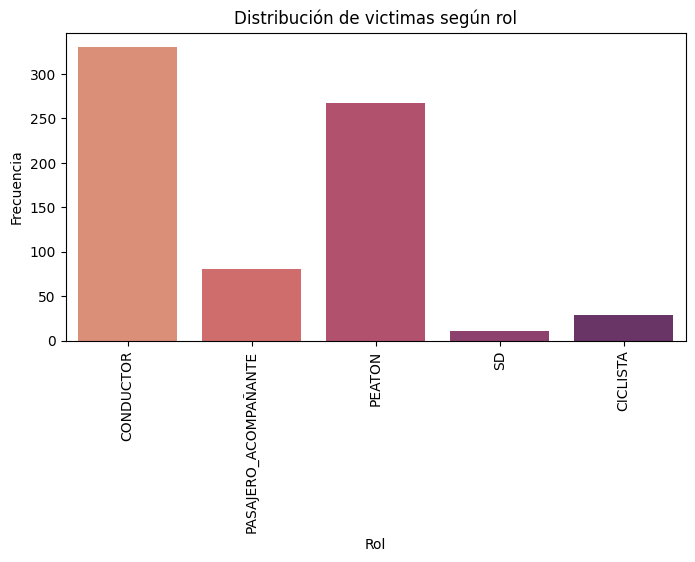

In [218]:
plt.figure(figsize=(8, 4))

sns.countplot(df, x='ROL', palette="flare")

plt.xticks(rotation=90) 

plt.xlabel('Rol')
plt.ylabel('Frecuencia')
plt.title('Distribución de victimas según rol')

plt.show()


<p>



</p>

**VICTIMA**

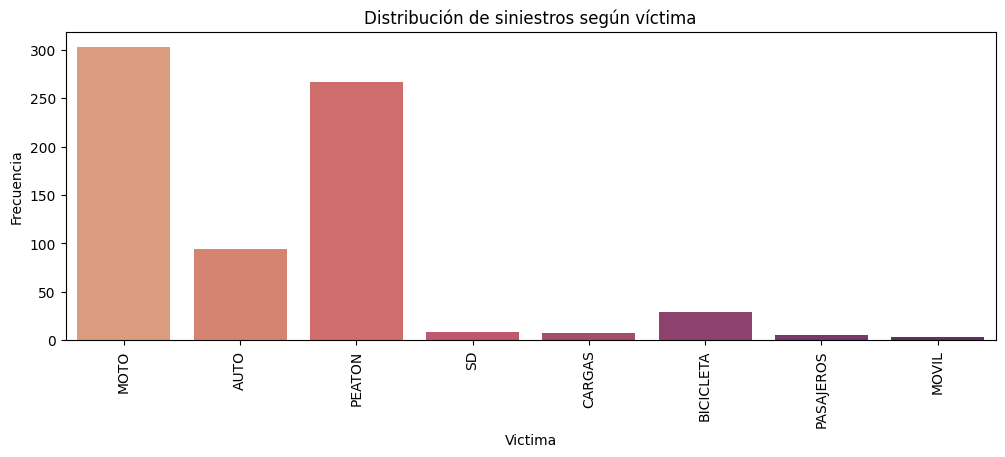

In [219]:
plt.figure(figsize=(12, 4))

sns.countplot(df, x='VICTIMA', palette="flare")

plt.xticks(rotation=90)

plt.xlabel('Victima')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros según víctima')

plt.show()


<p>



</p>

**SEXO**

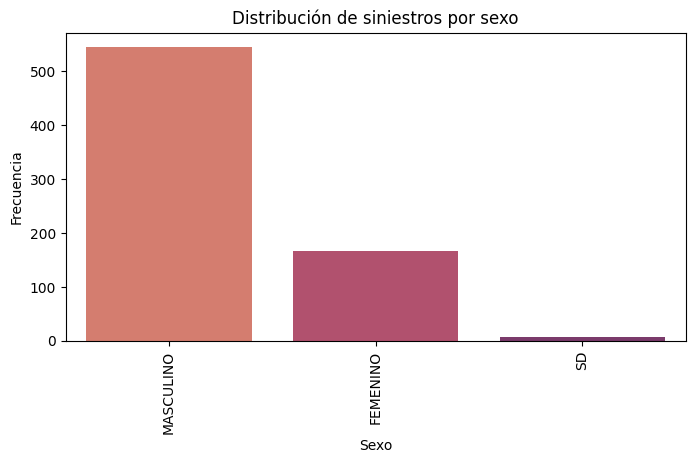

In [220]:
plt.figure(figsize=(8, 4))

sns.countplot(df, x='SEXO', palette="flare")

plt.xticks(rotation=90)

plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por sexo')

plt.show()


### 8. Creación CSV

El último paso de nuestro análisis exploratorio es crear un archivo CSV. 

El objetivo es poder leer el archivo ya trabajado, en una plataforma de visualización. 

In [223]:
df.to_csv('Victimas', index=False)

<p>



</p>